# Setup the execution environment

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%cd /home/super/source/finance_scrapy
# %pwd

/home/super/source/finance_scrapy


*** Time Period ***
2014-01-02 - 2018-03-31
*** Column Mapping ***
0005: 漲跌點數
0703: 臺股期貨_到期月份_買方_前十大交易人合計_部位數
0704: 臺股期貨_到期月份_買方_前十大交易人合計_百分比
0707: 臺股期貨_到期月份_賣方_前十大交易人合計_部位數
0708: 臺股期貨_到期月份_賣方_前十大交易人合計_百分比
0712: 臺股期貨_所有契約_買方_前十大交易人合計_部位數
0713: 臺股期貨_所有契約_買方_前十大交易人合計_百分比
0716: 臺股期貨_所有契約_賣方_前十大交易人合計_部位數
0717: 臺股期貨_所有契約_賣方_前十大交易人合計_百分比


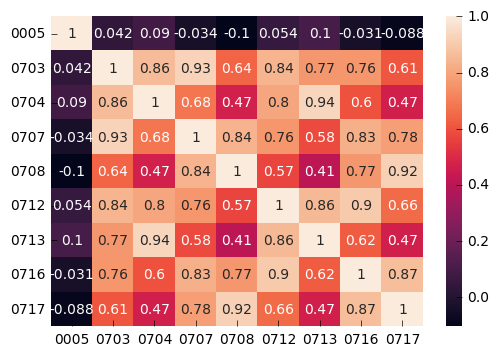

In [10]:
%run finance_analysis.py -v

In [11]:
plt.show()
plt.plot(df['0005'])

In [7]:
df.head()
df_drop = df.drop('0005',axis=1)
df_drop.head()
df_drop.iloc[0:5]

,0703,0704,0707,0708,0712,0713,0716,0717
date,,,,,,,,
2014-01-02,32221,49.0,30893,47.0,33316,44.2,31688,42.0
2014-01-03,29668,45.2,31555,48.1,31168,40.8,33085,43.3
2014-01-06,28050,43.8,29830,46.5,30103,39.7,32094,42.3
2014-01-07,28801,44.2,30396,46.6,30487,38.7,33928,43.1
2014-01-08,27142,43.0,29973,47.5,29089,37.3,33859,43.4


In [51]:
type(df_drop.iloc[0:3].sum())

pandas.core.series.Series

In [68]:
def accumulate(df, accumulate_cnt):
#     accumulate_cnt = 3
    start_index = accumulate_cnt - 1
    cur_index = start_index 
    accumulate_df = pd.DataFrame(index=df.index[start_index:], columns=df.columns)
    for index in range(len(accumulate_df)):
        accumulate_df.iloc[index] = df.iloc[index:index+accumulate_cnt].sum()
    accumulate_df
    return accumulate_df
accumulate_cnt = 20
accumulate_df = accumulate(df.drop('0005',axis=1), accumulate_cnt)
accumulate_df['0005'] = df['0005'].iloc[accumulate_cnt-1:]
accumulate_df.head()
# accumulate_cnt = 3
# cur_index = accumulate_cnt
# for index, row in df_drop[accumulate_cnt:].iterrows():
#     accumulate_sum = df[cur_index:cur_index+accumulate_cnt].sum()
#     print(index, accumulate_sum['0005'])
#     cur_index += 1

,0103,0106,0109,0112,total,0005
date,,,,,,
2014-12-26,1909108636,1843429221,-6927044009,-57354364694,-60528870846,55.37
2014-12-27,1991152806,2214395353,-7036829143,-52138430707,-54969711691,4.43
2014-12-29,2211624712,4084193265,-4927808876,-33119737182,-31751728081,67.78
2014-12-30,1409485515,145379469,-4840746820,-29815171225,-33101053061,-17.85
2014-12-31,1338871606,-1622033707,-6009633901,-35009619808,-41302415810,38.83


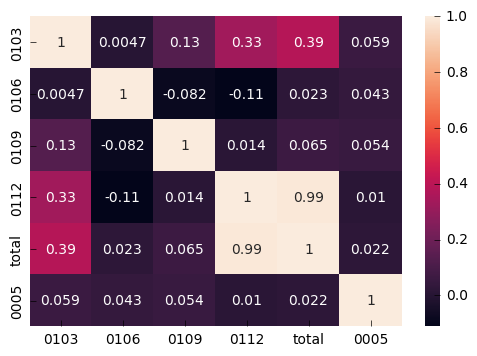

In [69]:
sns.heatmap(accumulate_df.corr(), annot=True)